#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

#Data Analysis

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#Assigning features and Scalling

In [5]:
x=np.array(df.Temperature)
y=np.array(df.Revenue)

#Splitting the data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

#Model selection(Random forest regressor)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
regressor=RandomForestRegressor(n_estimators=100,random_state=0)

#Training the model

In [10]:
regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [11]:
y_pred=regressor.predict(x_test.reshape(-1,1))

In [12]:
pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [13]:
pred.head()

,Actual,Predicted
0,449.112869,480.289598
1,562.792463,638.952102
2,570.990932,536.241837
3,268.929179,340.931344
4,857.526641,834.855726


Text(0, 0.5, 'Revenue')

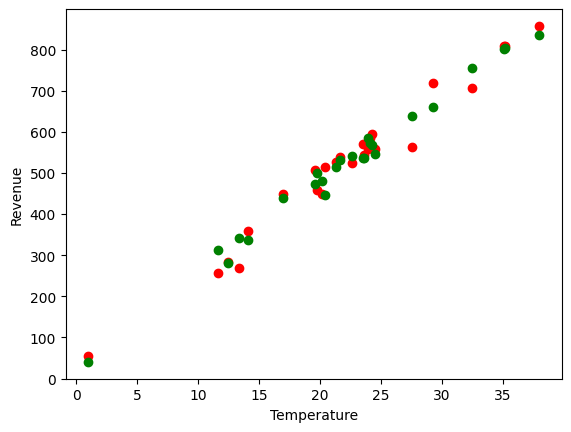

In [14]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.xlabel("Temperature")
plt.ylabel("Revenue")

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9595645683478229

#The Random Forest Project

In [16]:
from google.colab import files
files.upload()


Saving car data.csv to car data.csv


{'car data.csv': b'Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner\r\nritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0\r\nsx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0\r\nciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0\r\nwagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0\r\nswift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0\r\nvitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0\r\nciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0\r\ns cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0\r\nciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0\r\nciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0\r\nalto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0\r\nciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0\r\nciaz,2015,7.5,9.94,15000,Petrol,Dealer,Automatic,0\r\nertiga,2015,6.1,7.71,26000,Petrol,Dealer,Manual,0\r\ndzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0\r\nertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0\r\nertiga,2015,7.25,10.79,41678,Die

In [17]:
df=pd.read_csv('car data.csv')

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
df['current_year']=2025

In [20]:
df['number_of_years']=df['current_year']-df['Year']

In [21]:
#remove car_name,year,current_year columns
df.drop(['Car_Name','Year','current_year'],axis=1,inplace=True)

In [22]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [23]:
new=pd.get_dummies(df)

In [24]:
new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,11,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,12,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,8,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,14,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,11,False,True,False,True,False,False,True


In [25]:
#Delect columns 	Fuel_Type_CNG and Seller_Type_Dealer	as its presence doesnt impact for our prediction
new.drop(['Fuel_Type_CNG','Seller_Type_Dealer'],axis=1,inplace=True)

In [26]:
new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,False,True
1,4.75,9.54,43000,0,12,True,False,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,False,True
3,2.85,4.15,5200,0,14,False,True,False,False,True
4,4.60,6.87,42450,0,11,True,False,False,False,True


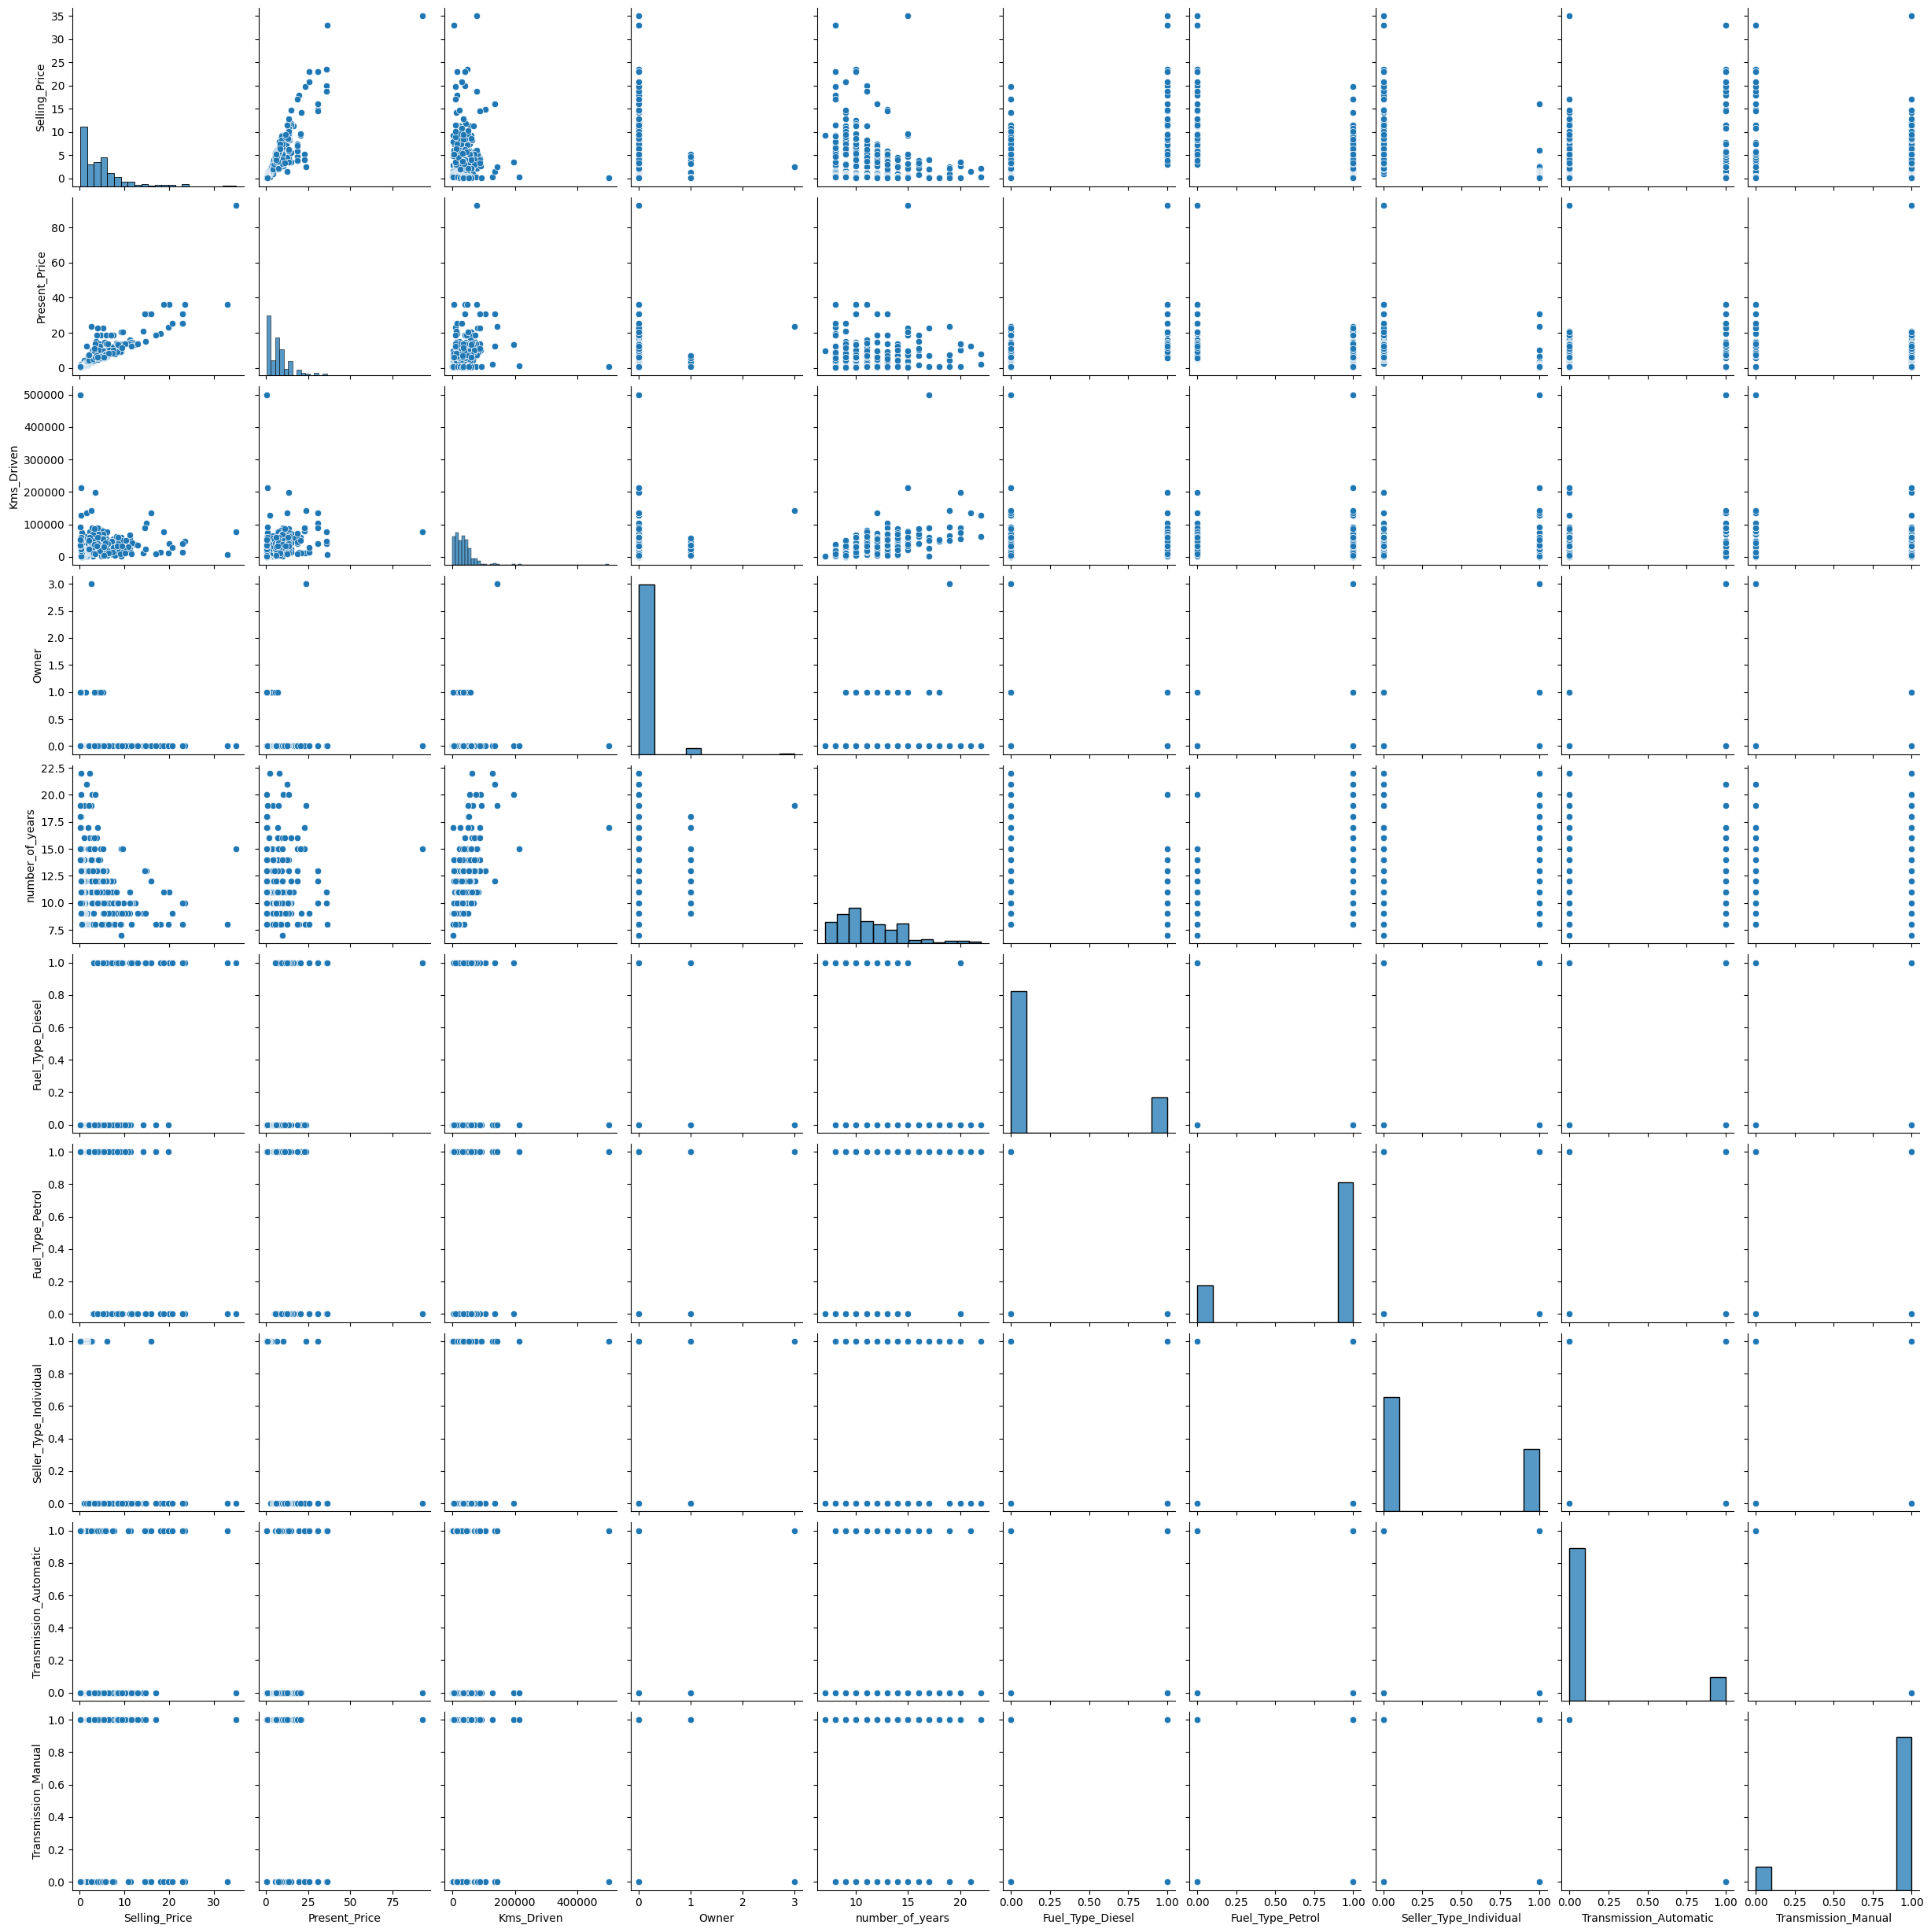

In [27]:
sns.pairplot(new)


<Axes: >

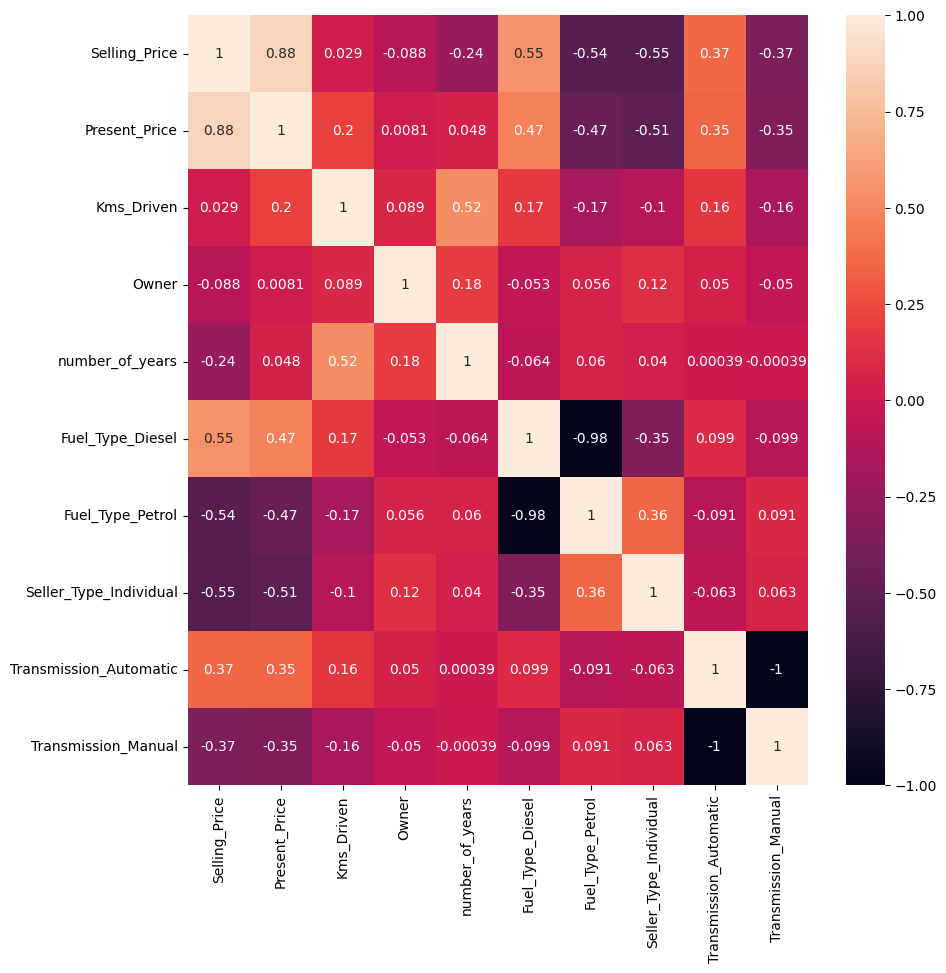

In [28]:
#figsize
plt.figure(figsize=(10,10))
#heatmap
sns.heatmap(new.corr(),annot=True)


In [37]:
#X=new.drop(['Selling_Price'],axis=1)
#Y=new['Selling_Price']
X=new.iloc[:,1:]
Y=new.iloc[:,0]

In [38]:
X

,Present_Price,Kms_Driven,Owner,number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,11,False,True,False,False,True
1,9.54,43000,0,12,True,False,False,False,True
2,9.85,6900,0,8,False,True,False,False,True
3,4.15,5200,0,14,False,True,False,False,True
4,6.87,42450,0,11,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,9,True,False,False,False,True
297,5.90,60000,0,10,False,True,False,False,True
298,11.00,87934,0,16,False,True,False,False,True
299,12.50,9000,0,8,True,False,False,False,True


In [39]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


#Feature Selection

In [40]:
from sklearn.ensemble import ExtraTreesRegressor

In [41]:
model=ExtraTreesRegressor()
feat_imp=model.fit(X,Y)

In [42]:
feat_imp.feature_importances_

array([0.35568158, 0.03743529, 0.00045691, 0.07674447, 0.24774034,
       0.00656608, 0.11927185, 0.06866236, 0.08744112])

In [43]:
imp=pd.Series(feat_imp.feature_importances_,index=X.columns)

<Axes: >

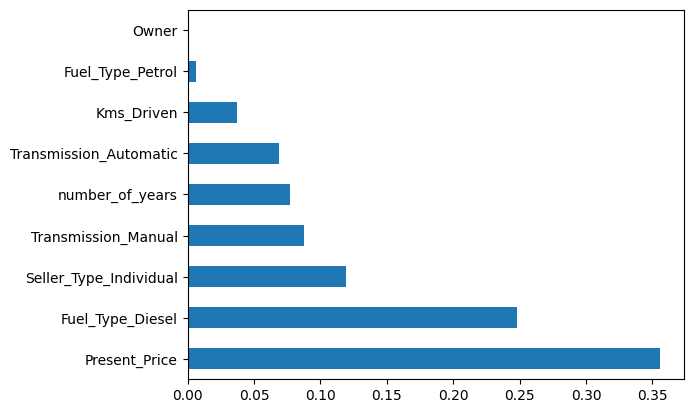

In [44]:
imp.nlargest(10).plot(kind='barh')

#Splitting the data

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [123]:
x_train

,Present_Price,Kms_Driven,Owner,number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
74,8.93,83000,0,11,True,False,False,False,True
239,4.43,23709,0,13,False,True,False,False,True
64,36.23,6000,0,8,True,False,False,True,False
294,6.80,33019,0,11,False,True,False,False,True
286,7.90,28569,0,9,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
251,9.90,56701,0,12,False,True,False,False,True
192,0.75,49000,1,18,False,True,True,False,True
117,1.90,14000,0,10,False,True,True,False,True
47,4.15,65000,0,19,False,True,False,False,True


In [124]:
x_train.shape

(240, 9)

In [125]:
y_train.shape

(240,)

#Model selection

In [126]:
model=RandomForestRegressor()

#Hyperparameter Tuning

In [127]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [128]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
rf=RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=42,n_jobs=1)

#Train the model

In [133]:

rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [134]:
rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

#Prediction

In [135]:
y_pred=rf.predict(x_test)

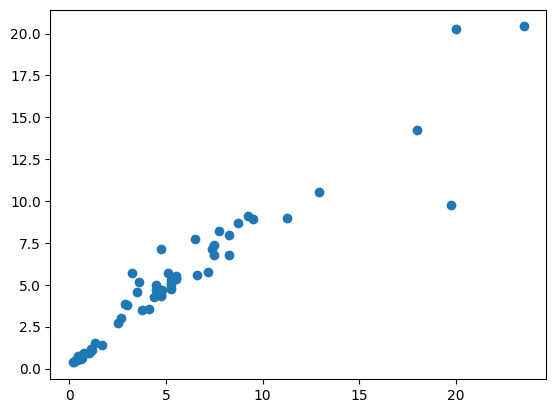

In [136]:
plt.scatter(y_test,y_pred)

In [137]:
finaldf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

<Axes: >

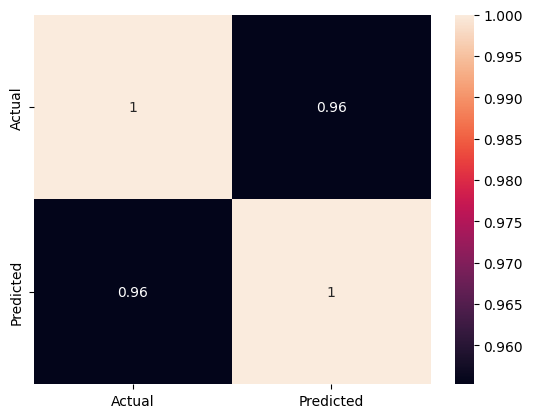

In [138]:
sns.heatmap(finaldf.corr(),annot=True)

#Performance metrics

In [142]:
r2_score(y_test,y_pred)


0.895703939761584